In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# **数据读取**

In [2]:
data = pd.read_csv('wine.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# ****数据观察**** 
绘制热力图观察各特征间相关系数，发现相关系数较高几组为[0,12],[5,6],[5,11],[6,11],[6,8],[10,11]

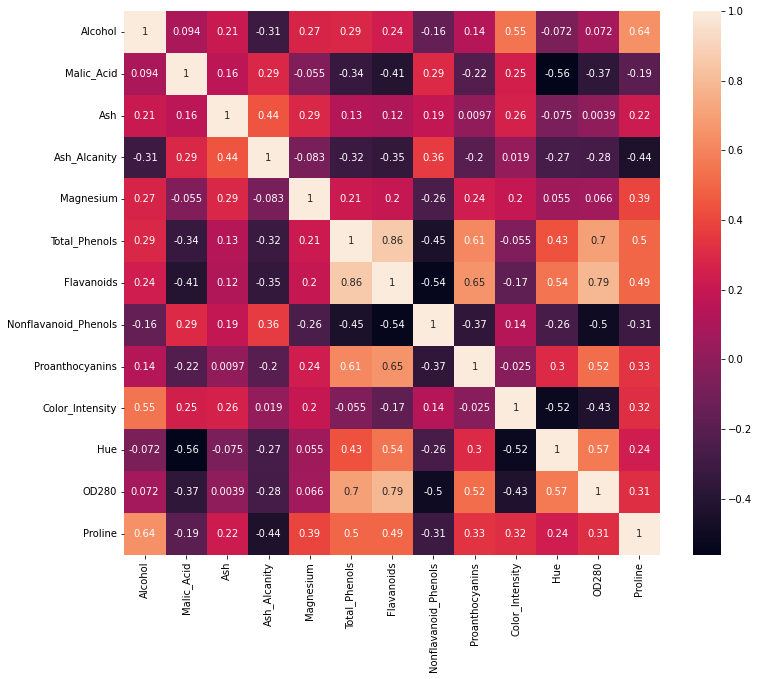

In [3]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(), annot=True)
plt.show()

# Feature scaling
对数据进行标准化、归一化处理

In [4]:
#数据标准化Standard（feature scaling）
sc = StandardScaler()
data_std = sc.fit_transform(data)
data_std = pd.DataFrame(data_std)
#归一化 MinMax
mm = MinMaxScaler()
mm_scale = mm.fit(data_std)
data_mm = mm_scale.transform(data_std)
print("feature scaling:",pd.DataFrame(data_mm).head())

feature scaling:          0         1         2         3         4         5         6   \
0  0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1  0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2  0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3  0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4  0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   

         7         8         9         10        11        12  
0  0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1  0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2  0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3  0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4  0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  


# 确定K值
使用碎石图确定了k值，发生畸变幅度最大的点即为最好的聚类数目
由碎石图可知，该数据集选用K值为3最佳

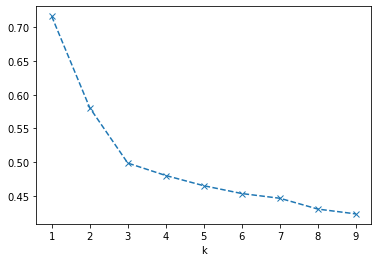

In [5]:
from scipy.spatial.distance import cdist

meandistortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans .fit(data_mm)
    meandistortions.append(
        sum(
            np.min(cdist(data_mm,kmeans.cluster_centers_,'euclidean'),axis = 1)
        )/data_mm.shape[0]
    )
plt.plot(range(1,10),meandistortions,'x--')
plt.xlabel('k')
plt.show()

# 使用多种聚类方法对wine数据进行聚类比较


****K-means****

In [6]:
#直接使用K-means进行聚类
#使用k-means++选择初始置信度，加速迭代过程收敛，将最大迭代次数设为400
k_means = KMeans(init='k-means++',n_clusters=3,max_iter=400)
k_means.fit(data_mm)
label = k_means.fit_predict(data_mm)
print(label)#分类标签结果

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


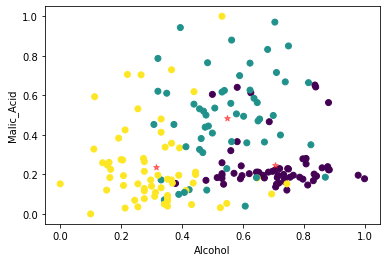

In [7]:
plt.scatter(data_mm[:,0], data_mm[:,1], c=label)
centers = k_means.cluster_centers_
labels = k_means.labels_
plt.scatter(centers[:,0], centers[:,1], c='red', marker='*',alpha=0.5)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

****PCA降维****

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


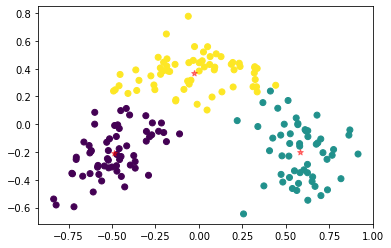

In [8]:
pca = PCA(n_components = 0.95)#使降维后误差小于0.05
pca.fit(data_mm)
data_PCA = pca.transform(data_mm)
k_means.fit(data_PCA)
label_pca = k_means.fit_predict(data_PCA)
print(label_pca)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_pca)
centers_PCA = k_means.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='red', marker='*',alpha=0.5)
plt.show()

**MiniBatchKMeans**

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 0 0 0 0 0 0 2 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


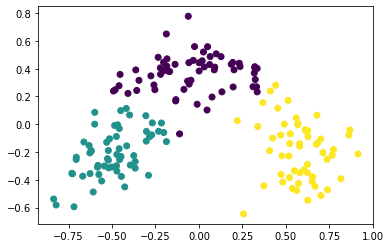

In [9]:
from sklearn.cluster import MiniBatchKMeans
#Mini-Batch K-means
mini_kmeans = MiniBatchKMeans(n_clusters=3)
mini_kmeans.fit(data_PCA)
label_mini = mini_kmeans.predict(data_PCA)
print(label_mini)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_mini)
plt.show()

# 性能对比


In [10]:
km = KMeans(3)
km.fit(data_mm)
km_pca = KMeans(3)
km_pca.fit(data_PCA)
km_mini = MiniBatchKMeans(3)
km_mini.fit(data_PCA)
print("直接进行k-means\tinertia: {}\n 数据经过降维后\tinertia: {}".format(km.inertia_,km_pca.inertia_))
print("Mini-Batch k-means\tinertia: {}".format(km_mini.inertia_))


直接进行k-means	inertia: 48.95403581962662
 数据经过降维后	inertia: 45.66100259002709
Mini-Batch k-means	inertia: 45.78601042788344


**DBSCAN**



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  1  1  0  0  0  0 -1  0  1 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


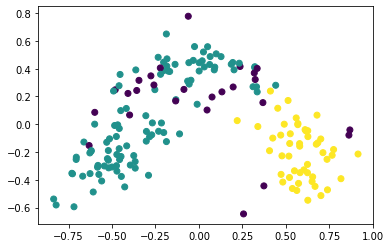

In [11]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.45,min_samples=3) #0.5识别为1类，0.45为2类
label_dbs = dbscan.fit_predict(data_PCA)
print(label_dbs)#分类标签结果
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_dbs)
plt.show()

**GaussianMixture**

基于概率模型，将数据分解为若干个基于高斯概率密度函数形成的模型

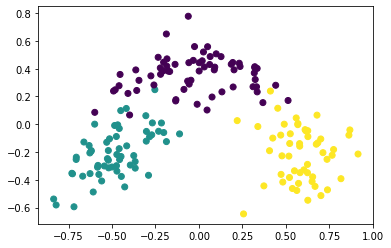

In [12]:
from sklearn.mixture import GaussianMixture
#GMM
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(data_PCA)
gmm_pred = gmm.predict(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=gmm_pred)
plt.show()

**Dendrogram层次聚类**

通过绘制树状图，可视化解释聚类结果，所得树状图中横坐标表示各个样本，纵坐标表示距离。同时不需要指定簇的数量。

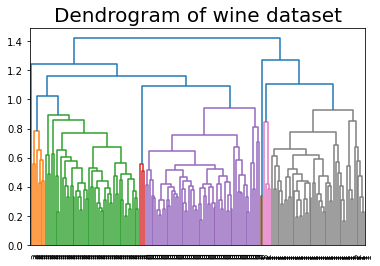

In [13]:
from scipy.cluster import hierarchy

plt.title('Dendrogram of wine dataset',fontdict={'size':20})
Z=hierarchy.linkage(y=data_PCA,method='weighted',metric='euclidean')
hierarchy.dendrogram(Z=Z,labels=label_pca,orientation='top',leaf_rotation=90,leaf_font_size=7,truncate_mode='none',p=3) #画聚类树
plt.xticks(color='black',rotation=90,verticalalignment='top',horizontalalignment='left') #进一步更改x轴标签
plt.tick_params(axis='x',direction='out',length=4,width=2,pad=4,labelsize=9)
plt.show()

# 自定义二分Kmeans



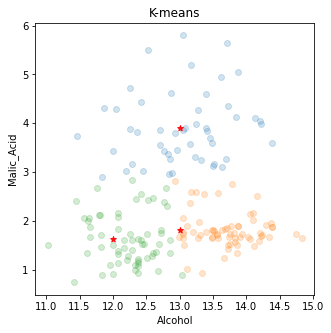

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
def findDistance(x, y):
    return np.sqrt(np.sum(np.power(x - y, 2)))
 
def findPoints(data, k):
    m, n = np.shape(data)
    points = np.mat(np.zeros((k, n)))
    for i in range(n):
        min = np.min(data[:, i])
        I = float(np.max(data[:, i]) - min)
        points[:, i] = min + I * np.random.rand(k, 1)
    return points
 
def kMeans(data, k):
    m, n = np.shape(data)
    cluster = np.mat(np.zeros((m, 2)))
    points = findPoints(data, k)
    flag = True
    while flag:
        flag = False
        for i in range(m):
            minDistance = np.inf
            minIndex = -1
            for j in range(k):
                distance = findDistance(points[j, :], data[i, :])
                if distance < minDistance:
                    minDistance = distance
                    minIndex = j
            if cluster[i, 0] != minIndex:
                flag = True
            cluster[i, :] = minIndex, minDistance ** 2
        for p in range(k):
            pts = data[np.nonzero(cluster[:, 0].A == p)[0]]
            points[p, :] = np.mean(pts, axis=0)
    return points, cluster
 
def diKMeans(data, k):
    m, n = np.shape(data)
    cluster = np.mat(np.zeros((m, 2)))
    points = np.mean(data, axis=0).tolist()[0]
    pointsList = [points]
    for i in range(m):
        cluster[i, 1] = findDistance(points, data[i, :])**2
 
    while len(pointsList) < k:
        SSE = np.inf
 
        for j in range(len(pointsList)):
            pts = data[np.nonzero(cluster[:, 0].A == j)[0], :]
            pointsMatrix, informationOfData = kMeans(pts, 2)
            SSESplit = np.sum(informationOfData[:, 1])
            SSENoSplit = np.sum(cluster[np.nonzero(cluster[:, 0].A != j)[0], 1])
 
            tempLowestSEE = SSESplit + SSENoSplit
            if tempLowestSEE < SSE:
                splitPoints = j
                newPoints = pointsMatrix
                newInformationOfData = informationOfData
                SSE = tempLowestSEE
 
        newInformationOfData[np.nonzero(newInformationOfData[:, 0].A == 1)[0], 0] = len(pointsList)
        newInformationOfData[np.nonzero(newInformationOfData[:, 0].A == 0)[0], 0] = splitPoints
        pointsList[splitPoints] = newPoints[0, :]
        pointsList.append(newPoints[1, :])
        cluster[np.nonzero(cluster[:, 0].A == splitPoints)[0], :] = newInformationOfData
 
    try:
        return np.mat(pointsList), cluster
    except ValueError:
        return np.mat(np.array(list(map(lambda x: [int(x[0]), x[1]],
                                        [np.matrix.tolist(i)[0] for i in pointsList])))), cluster

    
data1 = pd.read_csv('/input/wine-dataset-for-clustering/wine-clustering.csv')
data1 = pd.DataFrame({'x': data1['Alcohol'], 'y': data1['Malic_Acid']})
data1 = data1.to_numpy()

k = 3
centroids, cluster = diKMeans(data1, k)

plt.figure(figsize=(5, 5))
plt.xlabel("Alcohol")
plt.ylabel("Malic_Acid")
plt.title('K-means')
for i in range(k):
    pts = data1[np.nonzero(cluster[:, 0].A == i)[0], :]
    plt.scatter(np.matrix(pts[:, 0]).A[0], np.matrix(pts[:, 1]).A[0],  alpha=0.2)
plt.scatter(centroids[:, 0].flatten().A[0], centroids[:, 1].flatten().A[0], marker='*', color='red', alpha=0.9)
plt.show()

